# Covid Cases in Montgomery County Public Schools (data from Jan 2022)
### Purpose:
The goal of this project is to conduct data preparation and feature engineering on data for the infection rate of schools in Montgomery County, MD. The data is then used to create a dashboard in Tableau.

### Method:
- Data cleaning with Pandas
- Prepare data to create a dashboard with Tableau

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import haversine as hs
import sklearn.neighbors

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100

## Directories

In [2]:
main_dir = os.path.join(os.getcwd())
data_dir = os.path.join(main_dir, 'data')

## Data

In [3]:
jan5_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_5')
jan6_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_6')
jan7_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_7')
jan8_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_8')
jan9_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_9')
jan10_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_10')
jan11_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_11')
jan12_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_12')
jan13_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_13')
jan14_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_14')
jan15_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_15')
jan16_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_16')
jan17_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_17')
jan18_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_18')
jan19_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_19')
jan20_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_20')
jan21_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_21')
jan22_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_22')
jan23_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_23')
jan24_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_24')
jan25_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_25')
jan26_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_26')
jan27_mcps_covid_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='jan_27')

winter_break_cases = pd.read_excel(os.path.join(data_dir, 'mcps_covid_cases.xlsx'), sheet_name='winter_break')
geo_data = pd.read_csv(os.path.join(data_dir, 'Public_Schools.csv'))

In [4]:
all_data = [jan5_mcps_covid_cases, 
            jan6_mcps_covid_cases, 
            jan7_mcps_covid_cases,
            jan8_mcps_covid_cases,
            jan9_mcps_covid_cases, 
            jan10_mcps_covid_cases,
            jan11_mcps_covid_cases,
            jan12_mcps_covid_cases,
            jan13_mcps_covid_cases,
            jan14_mcps_covid_cases,
            jan15_mcps_covid_cases,
            jan16_mcps_covid_cases,
            jan17_mcps_covid_cases,
            jan18_mcps_covid_cases,
            jan19_mcps_covid_cases,
            jan20_mcps_covid_cases,
            jan21_mcps_covid_cases,
            jan22_mcps_covid_cases,
            jan23_mcps_covid_cases,
            jan24_mcps_covid_cases,
            jan25_mcps_covid_cases,
            jan26_mcps_covid_cases,
            jan27_mcps_covid_cases]

In [5]:
# date ranges
start_date = pd.to_datetime('Jan. 5, 2022').date()
end_date   = pd.to_datetime('Jan. 27, 2022').date()

range_of_dates = pd.date_range(start=start_date, end=end_date)

In [6]:
range_of_dates

DatetimeIndex(['2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27'],
              dtype='datetime64[ns]', freq='D')

In [7]:
geo_data = geo_data[['CATEGORY', 'SCHOOL NAME', 'LONGITUDE', 'LATITUDE']]
geo_data[90:105]

,CATEGORY,SCHOOL NAME,LONGITUDE,LATITUDE
90,HIGH SCHOOLS,Watkins Mill HS,-77.215836,39.183967
91,ELEMENTARY SCHOOLS,Brown Station ES,-77.230713,39.138883
92,ELEMENTARY SCHOOLS,Dr Sally K Ride ES,-77.237367,39.206818
93,MIDDLE SCHOOLS,Sligo MS,-77.032878,39.026779
94,ELEMENTARY SCHOOLS,Washington Grove ES,-77.177740,39.132489
95,ELEMENTARY SCHOOLS,Carderock Springs ES,-77.171760,38.983296
96,ELEMENTARY SCHOOLS,Judith A Resnik ES,-77.151986,39.181577
97,MIDDLE SCHOOLS,Forest Oak MS,-77.184466,39.153562
98,HIGH SCHOOLS,Poolesville HS,-77.418780,39.143103
99,HIGH SCHOOLS,Col Zadok Magruder HS,-77.118806,39.131311


## Data Preparation/Cleaning

In [8]:
# NaN values
for df in all_data:
    df.fillna(value=0, inplace=True)

In [9]:
jan5_mcps_covid_cases.head()

,School or Office Location Name,Staff,Student,Grand Total
0,A. Mario Loiederman Middle Sch,2.0,41.0,43
1,Albert Einstein High School,0.0,40.0,40
2,Alternative Programs,0.0,1.0,1
3,Arcola Elementary School,2.0,13.0,15
4,Argyle Middle School,1.0,21.0,22


In [10]:
# consistent naming
winter_break_cases.loc[winter_break_cases['School'] == 'Alternative Ed', ['School']] = 'Alternative Programs'

for df in all_data:
    df.loc[df['School or Office Location Name'] == 'Alternative Ed', ['School or Office Location Name']] = 'Alternative Programs'
    df.loc[df['School or Office Location Name'] == 'Central/Other', ['School or Office Location Name']] = 'Central Office/Other'
    df.loc[df['School or Office Location Name'] == 'Other/Central Office', ['School or Office Location Name']] = 'Central Office/Other' 
    df.loc[df['School or Office Location Name'] == 'Central Office', ['School or Office Location Name']] = 'Central Office/Other' 
    


In [11]:
# get unique schools for final df
schools_each_day = [list(set(df['School or Office Location Name'])) for df in all_data]

# 209 schools + central office
unique_schools = []
for i in range(len(schools_each_day)):
    unique_schools = list(set(unique_schools + schools_each_day[i]))
unique_schools.sort()

In [12]:
# merge into one data set and ensure unique column names
def prep_merge(df, idx):
    df.columns = [col if col == 'School or Office Location Name' else f'{col}_{idx}' for col in df.columns]
    return df

cases_df = pd.DataFrame(unique_schools, columns=['School or Office Location Name'])
for i in range(len(all_data)):
    cases_df = cases_df.merge(prep_merge(all_data[i], i), how='left', on='School or Office Location Name')

# ASSUMPTION: Schools that are missing have ZERO cases on that day
# therefore we impute zero for those schools on those days where they are not present in the data
cases_df = cases_df.fillna(0)
cases_df = cases_df.loc[cases_df['School or Office Location Name'] != 'Other']

In [13]:
# geo data prep
geo_data.loc[geo_data['CATEGORY'] == 'ELEMENTARY SCHOOLS', ['CATEGORY']] = 'elementary'
geo_data.loc[geo_data['CATEGORY'] == 'MIDDLE SCHOOLS', ['CATEGORY']] = 'middle'
geo_data.loc[geo_data['CATEGORY'] == 'HIGH SCHOOLS', ['CATEGORY']] = 'high'

geo_data = geo_data.loc[~geo_data['SCHOOL NAME'].str.contains(r'Constr')]
geo_data['SCHOOL NAME'] = [re.sub(r'\(.*\)$', '', sch).strip() for sch in geo_data['SCHOOL NAME']]
geo_data['SCHOOL NAME'] = [re.sub(r'.S$', '', sch).strip() for sch in geo_data['SCHOOL NAME']]
#geo_data['SCHOOL NAME'] = [sch.lower() for sch in geo_data['SCHOOL NAME']]
geo_data.reset_index(inplace=True, drop=True)

## Feature Engineering
1. type of school
2. total population
3. geographic location (lat, long)
4. convert to infection rates

### 1. School type

In [14]:
# type of school

pattern_1 = re.compile('elem')
pattern_2 = re.compile('mid')
pattern_3 = re.compile('high')
pattern_1_2 = re.compile('ES')
pattern_2_2 = re.compile('MS')
pattern_3_2 = re.compile('HS')

def det_school_type(school_name):
    if pattern_1_2.search(school_name):
        return 'elementary'
    elif pattern_2_2.search(school_name):
        return 'middle'
    elif pattern_3_2.search(school_name):
        return 'high'
    school_name = school_name.lower()
    if pattern_1.search(school_name):
        return 'elementary'
    elif pattern_2.search(school_name):
        return 'middle'
    elif pattern_3.search(school_name):
        return 'high'
    else:
        return 'other'

cases_df.insert(loc=1, 
                column='school_type', 
                value=[det_school_type(school) for school in cases_df['School or Office Location Name']])

### 2. Population

In [15]:
# population

def get_pop(school_name):
    pop = winter_break_cases['Total Staff and Students'].loc[winter_break_cases['School'] == school_name].values
    return pop

cases_df.insert(loc=2, 
                column='total_population', 
                value=[get_pop(school) for school in cases_df['School or Office Location Name']])

cases_df['total_population'] = [re.sub(r'[\[\]]','', str(item)) for item in cases_df['total_population']]
cases_df['total_population'] = [re.sub(r'nan','', str(item)) for item in cases_df['total_population']]
cases_df['total_population'] = pd.to_numeric(cases_df['total_population'])
cases_df['total_population'] = cases_df['total_population'].fillna(0)

In [16]:
cases_df.head()

,School or Office Location Name,school_type,total_population,Staff_0,Student_0,Grand Total_0,Staff_1,Student_1,Grand Total_1,Staff_2,Student_2,Grand Total_2,Staff_3,Student_3,Grand Total_3,Staff_4,Student_4,Grand Total_4,Staff_5,Student_5,Grand Total_5,Staff_6,Student_6,Grand Total_6,Staff_7,Student_7,Grand Total_7,Staff_8,Student_8,Grand Total_8,Staff_9,Student_9,Grand Total_9,Staff_10,Student_10,Grand Total_10,Staff_11,Student_11,Grand Total_11,Staff_12,Student_12,Grand Total_12,Staff_13,Student_13,Grand Total_13,Staff_14,Student_14,Grand Total_14,Staff_15,Student_15,Grand Total_15,Staff_16,Student_16,Grand Total_16,Staff_17,Student_17,Grand Total_17,Staff_18,Student_18,Grand Total_18,Staff_19,Student_19,Grand Total_19,Staff_20,Student_20,Grand Total_20,Staff_21,Student_21,Grand Total_21,Staff_22,Student_22,Grand Total_22
0,A. Mario Loiederman Middle Sch,middle,1059.0,2.0,41.0,43.0,2.0,23.0,25.0,2.0,6.0,8.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,7.0,3.0,4.0,7.0,0.0,18.0,18.0,0.0,5.0,5.0,2.0,5.0,7.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,8.0,9.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albert Einstein High School,high,2127.0,0.0,40.0,40.0,1.0,23.0,24.0,0.0,10.0,10.0,0.0,3.0,3.0,1.0,3.0,4.0,1.0,22.0,23.0,4.0,31.0,35.0,2.0,9.0,11.0,0.0,8.0,8.0,0.0,6.0,6.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,4.0,5.0,0.0,9.0,9.0,0.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,Alternative Programs,other,121.0,0.0,1.0,1.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arcola Elementary School,elementary,726.0,2.0,13.0,15.0,0.0,5.0,5.0,0.0,4.0,4.0,0.0,1.0,1.0,1.0,2.0,3.0,0.0,3.0,3.0,0.0,7.0,7.0,1.0,3.0,4.0,0.0,0.0,0.0,1.0,9.0,10.0,1.0,2.0,3.0,0.0,1.0,1.0,3.0,0.0,3.0,0.0,2.0,2.0,2.0,3.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,Argyle Middle School,middle,1084.0,1.0,21.0,22.0,10.0,27.0,37.0,1.0,23.0,24.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,9.0,9.0,1.0,22.0,23.0,0.0,26.0,26.0,2.0,12.0,14.0,1.0,19.0,20.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Geo data

In [17]:
# make schools in geo data match covid case data for merging 

def get_geo_school(sch, lvl):
    full_school = cases_df['School or Office Location Name'].loc[(cases_df['School or Office Location Name'].str.contains(sch)) & 
                               (cases_df['school_type'] == lvl)]
    if len(full_school) == 0:
        sch_1 = sch.split()[-1].strip()
        full_school = (cases_df['School or Office Location Name'].loc[(cases_df['School or Office Location Name'].str.contains(sch_1)) & 
                                                                      (cases_df['school_type'] == lvl)])
        return full_school.values
    if len(full_school) >= 2:
        full_school = [item.split() for item in full_school]
        if len(full_school[0]) < len(full_school[1]):
            full_school = full_school[0]
        else:
            full_school = full_school[1]
        full_school = " ".join(full_school)
        #print(full_school)
        return full_school
    return full_school.values

geo_data['full_school'] = [get_geo_school(sch, level) for sch,level in zip(geo_data['SCHOOL NAME'], geo_data['CATEGORY'])]
geo_data['full_school'] = [re.sub(r'[\[\]]','', str(item)) for item in geo_data['full_school']]
geo_data['full_school'] = [re.sub(r'\'','', str(item)) for item in geo_data['full_school']]

In [18]:
# manually deal with remaining schools that did not get updated names programmatically
geo_data.loc[geo_data['SCHOOL NAME'] == 'S Christa Mcauliffe', ['full_school']] = 'S. Christa McAuliffe ES'
geo_data.loc[geo_data['SCHOOL NAME'] == 'Col E Brooke Lee', ['full_school']] = 'Odessa Shannon Middle Schl'
geo_data.loc[geo_data['SCHOOL NAME'] == 'Dufief', ['full_school']] = 'DuFief Elementary School'
geo_data.loc[geo_data['SCHOOL NAME'] == 'Downcounty Consortium', ['full_school']] = 'Flora M. Singer Elem School'

In [19]:
geo_data.head()

,CATEGORY,SCHOOL NAME,LONGITUDE,LATITUDE,full_school
0,elementary,Beall,-77.161758,39.087775,Beall Elementary School
1,elementary,Clearspring,-77.207301,39.265783,Clearspring Elementary School
2,elementary,Sherwood,-77.033116,39.149584,Sherwood Elementary School
3,elementary,Pine Crest,-77.005038,39.021311,Pine Crest Elementary School
4,middle,Earle B. Wood,-77.107529,39.093295,Earle B. Wood Middle School


### merge geographic coordinates into covid case data

In [20]:
# drop unecessary columns in geo data
geo_data = geo_data[['full_school', 'LONGITUDE', 'LATITUDE']]

In [21]:
# merge on school name
cases_df = cases_df.merge(geo_data, how='left', left_on='School or Office Location Name',
                          right_on='full_school')

In [22]:
cases_df.loc[cases_df['full_school'].isna()]

,School or Office Location Name,school_type,total_population,Staff_0,Student_0,Grand Total_0,Staff_1,Student_1,Grand Total_1,Staff_2,Student_2,Grand Total_2,Staff_3,Student_3,Grand Total_3,Staff_4,Student_4,Grand Total_4,Staff_5,Student_5,Grand Total_5,Staff_6,Student_6,Grand Total_6,Staff_7,Student_7,Grand Total_7,Staff_8,Student_8,Grand Total_8,Staff_9,Student_9,Grand Total_9,Staff_10,Student_10,Grand Total_10,Staff_11,Student_11,Grand Total_11,Staff_12,Student_12,Grand Total_12,Staff_13,Student_13,Grand Total_13,Staff_14,Student_14,Grand Total_14,Staff_15,Student_15,Grand Total_15,Staff_16,Student_16,Grand Total_16,Staff_17,Student_17,Grand Total_17,Staff_18,Student_18,Grand Total_18,Staff_19,Student_19,Grand Total_19,Staff_20,Student_20,Grand Total_20,Staff_21,Student_21,Grand Total_21,Staff_22,Student_22,Grand Total_22,full_school,LONGITUDE,LATITUDE
2,Alternative Programs,other,121.0,0.0,1.0,1.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7,Bayard Rustin Elementary Schl,elementary,823.0,4.0,17.0,21.0,0.0,3.0,3.0,0.0,5.0,5.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,6.0,6.0,1.0,13.0,14.0,1.0,7.0,8.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
29,Carl Sandburg Learning Center,other,158.0,0.0,1.0,1.0,2.0,3.0,5.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
32,"Central Office (including DOT, DMM, HR, CESC, etc.)",elementary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,4.0,0.0,4.0,4.0,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN
33,Central Office/Other,other,0.0,53.0,6.0,59.0,27.0,7.0,32.0,19.0,3.0,22.0,8.0,0.0,8.0,5.0,0.0,6.0,8.0,2.0,10.0,23.0,2.0,25.0,14.0,1.0,15.0,27.0,0.0,27.0,12.0,3.0,15.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
79,Hallie Wells Middle Sch,middle,1086.0,1.0,5.0,6.0,2.0,3.0,5.0,3.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,1.0,1.0,1.0,4.0,5.0,0.0,4.0,4.0,0.0,6.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,5.0,0.0,3.0,3.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN
102,Longview School,other,0.0,2.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
105,MacDonald Knolls Early Childhood Center,other,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
132,RICA - Reg Inst for Child/Adol,other,152.0,1.0,3.0,4.0,16.0,0.0,16.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
142,Rock Terrace School,other,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0

In [23]:
# manually add lat long for specialty schools
cases_df.loc[cases_df['School or Office Location Name'] == 'Bayard Rustin Elementary Schl', ['LATITUDE', 'LONGITUDE']] = 39.071754032830526,-77.1450677
cases_df.loc[cases_df['School or Office Location Name'] == 'Carl Sandburg Learning Center', ['LATITUDE', 'LONGITUDE']] = 39.09147868397719,-77.13597220213595
cases_df.loc[cases_df['School or Office Location Name'] == 'Hallie Wells Middle Sch', ['LATITUDE', 'LONGITUDE']] = 39.232482489931236,-77.23961509473722
cases_df.loc[cases_df['School or Office Location Name'] == 'Longview School', ['LATITUDE', 'LONGITUDE']] = 39.15066626138123,-77.29250576960125
cases_df.loc[cases_df['School or Office Location Name'] == 'MacDonald Knolls Early Childhood Center', ['LATITUDE', 'LONGITUDE']] = 39.03092322729867, -77.02622024261747
cases_df.loc[cases_df['School or Office Location Name'] == 'RICA - Reg Inst for Child/Adol', ['LATITUDE', 'LONGITUDE']] = 39.103188048023775, -77.2013729161806
cases_df.loc[cases_df['School or Office Location Name'] == 'Rock Terrace School', ['LATITUDE', 'LONGITUDE']] = 39.093362820583025, -77.15967219474052
cases_df.loc[cases_df['School or Office Location Name'] == 'Silver Creek Middle School', ['LATITUDE', 'LONGITUDE']] = 39.01616200704704, -77.07466316775577
cases_df.loc[cases_df['School or Office Location Name'] == 'Snowden Farm ES', ['LATITUDE', 'LONGITUDE']] = 39.226882478940226,-77.24880583521747
cases_df.loc[cases_df['School or Office Location Name'] == 'Stephen Knolls School', ['LATITUDE', 'LONGITUDE']] = 39.03389565558191, -77.05148113707092
cases_df.loc[cases_df['School or Office Location Name'] == 'Thomas Edison High School of Technology', ['LATITUDE', 'LONGITUDE']] = 39.06199289096955, -77.0661359100835
cases_df.loc[cases_df['School or Office Location Name'] == 'Upcounty Early Childhood Center', ['LATITUDE', 'LONGITUDE']] = 39.15380391012209, -77.16481580836859
cases_df.loc[cases_df['School or Office Location Name'] == 'Wilson Wims Elementary School', ['LATITUDE', 'LONGITUDE']] = 39.2374610268883, -77.26079551987495


In [24]:
# drop central office and alt programs
cases_df = cases_df.loc[~cases_df['LATITUDE'].isna()]
# drop full_school col
del cases_df['full_school']

### 4. Infection rates

In [25]:
####### UPDATE:EXCLUDE SCHOOLS WITH REPORTED ZERO POPULATION  #######

# # impute 0 population schools with data
# """

# https://ww2.montgomeryschoolsmd.org/departments/regulatoryaccountability/glance/currentyear/schools/04748.pdf

# """
# cases_df.loc[cases_df['School or Office Location Name'] == 'Longview School', ['total_population']] = ''
# cases_df.loc[cases_df['School or Office Location Name'] == 'MacDonald Knolls Early Childhood Center', ['total_population']] = ''
# cases_df.loc[cases_df['School or Office Location Name'] == 'Thomas Edison High School of Technology', ['total_population']] = 840
# cases_df.loc[cases_df['School or Office Location Name'] == 'Upcounty Early Childhood Center', ['total_population']] = ''

rates_df = cases_df.copy()
case_cols = rates_df.filter(regex='_\d+$').columns
rates_df = rates_df.loc[rates_df['total_population'] != 0]

In [26]:
def calc_rate(cases, pop): 
    return ((cases/pop)*100)

for col in case_cols:
    rates_df[col] = [calc_rate(case,pop) for case,pop in zip(rates_df[col],rates_df['total_population'])]

cols = rates_df.columns
exclude_cols = [col for col in cols if re.search(r'^[Ss].+_\d+$',col)]
rates_df = rates_df[[col for col in rates_df.columns if col not in exclude_cols]]

In [27]:
rates_df.head()

,School or Office Location Name,school_type,total_population,Grand Total_0,Grand Total_1,Grand Total_2,Grand Total_3,Grand Total_4,Grand Total_5,Grand Total_6,Grand Total_7,Grand Total_8,Grand Total_9,Grand Total_10,Grand Total_11,Grand Total_12,Grand Total_13,Grand Total_14,Grand Total_15,Grand Total_16,Grand Total_17,Grand Total_18,Grand Total_19,Grand Total_20,Grand Total_21,Grand Total_22,LONGITUDE,LATITUDE
0,A. Mario Loiederman Middle Sch,middle,1059.0,4.060434,2.360718,0.755430,0.000000,0.377715,0.661001,0.661001,1.699717,0.472144,0.661001,0.094429,0.094429,0.094429,0.849858,0.283286,0.094429,0.188857,0.000000,0.000000,0.000000,0.283286,0.000000,0.000000,-77.070835,39.065306
1,Albert Einstein High School,high,2127.0,1.880583,1.128350,0.470146,0.141044,0.188058,1.081335,1.645510,0.517160,0.376117,0.282087,0.094029,0.000000,0.235073,0.423131,0.329102,0.047015,0.047015,0.047015,0.000000,0.094029,0.047015,0.047015,0.047015,-77.067036,39.039616
3,Arcola Elementary School,elementary,726.0,2.066116,0.688705,0.550964,0.137741,0.413223,0.413223,0.964187,0.550964,0.000000,1.377410,0.413223,0.137741,0.413223,0.275482,0.688705,0.275482,0.000000,0.000000,0.000000,0.000000,0.137741,0.137741,0.000000,-77.039388,39.045559
4,Argyle Middle School,middle,1084.0,2.029520,3.413284,2.214022,0.000000,0.276753,0.830258,2.121771,2.398524,1.291513,1.845018,0.184502,0.092251,0.184502,0.276753,0.184502,0.184502,0.000000,0.092251,0.184502,0.092251,0.000000,0.000000,0.000000,-77.048924,39.089521
5,Ashburton Elementary School,elementary,939.0,1.490948,0.958466,0.532481,0.638978,0.212993,1.916933,2.449414,0.319489,0.319489,1.384452,0.319489,0.212993,0.319489,0.425985,0.319489,0.106496,0.000000,0.106496,0.000000,0.106496,0.106496,0.000000,0.106496,-77.127721,39.019444


In [28]:
date_cols = rates_df[[col for col in cols if re.search(r'Grand Total_\d+$',col)]].columns

In [29]:
rates_df.rename(columns=dict(zip(date_cols,range_of_dates)), inplace=True)

In [30]:
rates_df

,School or Office Location Name,school_type,total_population,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-07 00:00:00,2022-01-08 00:00:00,2022-01-09 00:00:00,2022-01-10 00:00:00,2022-01-11 00:00:00,2022-01-12 00:00:00,2022-01-13 00:00:00,2022-01-14 00:00:00,2022-01-15 00:00:00,2022-01-16 00:00:00,2022-01-17 00:00:00,2022-01-18 00:00:00,2022-01-19 00:00:00,2022-01-20 00:00:00,2022-01-21 00:00:00,2022-01-22 00:00:00,2022-01-23 00:00:00,2022-01-24 00:00:00,2022-01-25 00:00:00,2022-01-26 00:00:00,2022-01-27 00:00:00,LONGITUDE,LATITUDE
0,A. Mario Loiederman Middle Sch,middle,1059.0,4.060434,2.360718,0.755430,0.000000,0.377715,0.661001,0.661001,1.699717,0.472144,0.661001,0.094429,0.094429,0.094429,0.849858,0.283286,0.094429,0.188857,0.000000,0.000000,0.000000,0.283286,0.000000,0.000000,-77.070835,39.065306
1,Albert Einstein High School,high,2127.0,1.880583,1.128350,0.470146,0.141044,0.188058,1.081335,1.645510,0.517160,0.376117,0.282087,0.094029,0.000000,0.235073,0.423131,0.329102,0.047015,0.047015,0.047015,0.000000,0.094029,0.047015,0.047015,0.047015,-77.067036,39.039616
3,Arcola Elementary School,elementary,726.0,2.066116,0.688705,0.550964,0.137741,0.413223,0.413223,0.964187,0.550964,0.000000,1.377410,0.413223,0.137741,0.413223,0.275482,0.688705,0.275482,0.000000,0.000000,0.000000,0.000000,0.137741,0.137741,0.000000,-77.039388,39.045559
4,Argyle Middle School,middle,1084.0,2.029520,3.413284,2.214022,0.000000,0.276753,0.830258,2.121771,2.398524,1.291513,1.845018,0.184502,0.092251,0.184502,0.276753,0.184502,0.184502,0.000000,0.092251,0.184502,0.092251,0.000000,0.000000,0.000000,-77.048924,39.089521
5,Ashburton Elementary School,elementary,939.0,1.490948,0.958466,0.532481,0.638978,0.212993,1.916933,2.449414,0.319489,0.319489,1.384452,0.319489,0.212993,0.319489,0.425985,0.319489,0.106496,0.000000,0.106496,0.000000,0.106496,0.106496,0.000000,0.106496,-77.127721,39.019444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Winston Churchill High School,high,2459.0,1.423343,1.504677,0.691338,0.284669,0.284669,1.342009,1.301342,0.406669,0.447336,0.406669,0.081334,0.000000,0.203335,0.244002,0.244002,0.203335,0.244002,0.122001,0.040667,0.122001,0.203335,0.000000,0.122001,-77.173128,39.044305
208,Wood Acres Elementary School,elementary,582.0,0.515464,0.343643,0.000000,0.515464,0.000000,0.859107,1.202749,0.515464,0.171821,0.343643,0.171821,0.000000,0.171821,0.171821,0.343643,0.000000,0.343643,0.000000,0.000000,0.515464,0.171821,0.343643,0.000000,-77.118672,38.967587
209,Woodfield Elementary School,elementary,363.0,1.377410,1.101928,1.377410,0.550964,0.550964,0.550964,0.550964,0.000000,0.275482,0.000000,0.000000,0.000000,0.550964,0.275482,0.000000,0.275482,0.275482,0.000000,0.275482,0.000000,0.000000,0.275482,0.826446,-77.198281,39.252783
210,Woodlin Elementary School,elementary,619.0,0.807754,0.484653,0.323102,0.161551,0.161551,0.161551,0.969305,0.000000,1.292407,0.484653,0.323102,0.000000,0.323102,1.453958,0.161551,0.323102,0.161551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.046772,39.006537


In [31]:
# pivot_cols = []
# for i in range(len(rates_df.columns[:3])):
#     pivot_cols.append(rates_df.columns[:3][i])
# for i in range(len(rates_df.columns[-2:])):
#     pivot_cols.append(rates_df.columns[-2:][i])

In [32]:
# #rates_df_pivot = rates_df[pivot_cols].copy()
# pivot_cols = rates_df.melt(variable_vars=['School or Office Location Name', 'school_type', 'total_population'], 
#                            value_vars=rates_df.columns[3:][:-2], var_name='date', value_name='infection_rate')

# pivot_cols

In [33]:
rates_df.to_csv('rates_with_dates.csv')

# Alternative Data Format

In [34]:
geo = rates_df.copy()
rates_df.set_index('School or Office Location Name', inplace=True, drop=True)

In [35]:
type_pop_look_up = rates_df[['school_type', 'total_population', 'LONGITUDE', 'LATITUDE']]
rates_df = rates_df[[col for col in rates_df.columns if col not in ['school_type', 'total_population', 'LONGITUDE', 'LATITUDE']]]

In [36]:
reformat_rates_df = rates_df.T

In [37]:
# reset index to dates
reformat_rates_df['date'] = range_of_dates
reformat_rates_df.set_index('date', inplace=True, drop=True)

In [38]:
reformat_rates_df

School or Office Location Name,A. Mario Loiederman Middle Sch,Albert Einstein High School,Arcola Elementary School,Argyle Middle School,Ashburton Elementary School,Bannockburn Elementary School,Bayard Rustin Elementary Schl,Beall Elementary School,Bel Pre Elementary School,Bells Mill Elementary School,Belmont Elementary School,Benjamin Banneker Middle Schl,Bethesda Elementary School,Bethesda-Chevy Chase High Schl,Beverly Farms Elementary Schl,Bradley Hills Elementary Schl,Briggs Chaney Middle School,Brooke Grove Elementary School,Brookhaven Elementary School,Brown Station Elementary Schl,Burning Tree Elementary School,Burnt Mills Elementary School,Burtonsville Elementary School,Cabin John Middle School,Candlewood Elementary School,Cannon Road Elementary School,Capt. James Daly Elementary,Carderock Springs Elem School,Carl Sandburg Learning Center,Cashell Elementary School,Cedar Grove Elementary School,Chevy Chase Elementary School,Clarksburg Elementary School,Clarksburg High School,Clearspring Elementary School,Clopper Mill Elementary School,Cloverly Elementary School,Col. Zadok Magruder High Schl,Cold Spring Elementary School,College Gardens Elem School,Cresthaven Elementary School,Damascus Elementary School,Damascus High School,Darnestown Elementary School,Diamond Elementary School,Dr. Charles Drew Elem School,"Dr. Martin Luther King, Jr. MS",Dr. Sally K. Ride Elem School,DuFief Elementary School,Earle B. Wood Middle School,...,Sherwood High School,Silver Creek Middle School,Silver Spring International MS,Sligo Creek Elementary School,Sligo Middle School,Snowden Farm ES,Somerset Elementary School,South Lake Elementary School,Spark M. Matsunaga Elem School,Springbrook High School,Stedwick Elementary School,Stephen Knolls School,Stone Mill Elementary School,Stonegate Elementary School,Strathmore Elementary School,Strawberry Knoll Elem School,Summit Hall Elementary School,Takoma Park Elementary School,Takoma Park Middle School,Thomas S. Wootton High School,Thomas W. Pyle Middle School,Thurgood Marshall Elem School,Tilden Middle School,Travilah Elementary School,Twinbrook Elementary School,Viers Mill Elementary School,Walt Whitman High School,Walter Johnson High School,Washington Grove Elem School,Waters Landing Elementary Schl,Watkins Mill Elementary School,Watkins Mill High School,Wayside Elementary School,Weller Road Elementary School,Westbrook Elementary School,Westland Middle School,Westover Elementary School,Wheaton High School,Wheaton Woods Elementary Schl,Whetstone Elementary School,White Oak Middle School,"William B. Gibbs, Jr. ES",William H. Farquhar Middle Sch,William Tyler Page ES,Wilson Wims Elementary School,Winston Churchill High School,Wood Acres Elementary School,Woodfield Elementary School,Woodlin Elementary School,Wyngate Elementary School
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-05,4.060434,1.880583,2.066116,2.029520,1.490948,0.426439,2.551640,2.313167,1.754386,0.772798,1.562500,1.037344,0.956284,1.897233,0.326797,0.562852,1.127820,4.431599,2.159827,2.514793,1.260504,0.425532,0.886263,0.952381,3.571429,0.000000,1.305057,0.529101,0.632911,3.191489,0.668151,0.392927,0.584112,1.610369,1.574803,1.346154,1.268499,1.836394,0.270270,1.851852,0.914077,1.678657,1.239400,0.265252,0.490798,2.317291,0.698603,1.769912,0.925926,1.959114,...,2.594100,0.673401,0.853375,1.117318,1.215067,1.338200,1.408451,0.000000,0.883652,2.313354,1.346801,0.000000,0.351494,1.621622,2.531646,4.035874,2.472188,0.480769,1.523657,1.172608,1.100413,0.679117,1.657941,0.748130,0.332226,1.639344,1.943064,1.274291,1.807229,0.121212,0.779510,1.387347,1.792829,2.663438,0.597015,1.114827,1.257862,2.550638,2.450980,2.473958,2.238806,1.258993,1.355014,3.129445,1.522070,1.423343,0.515464,1.377410,0.807754,0.646831
2022-01-06,2.360718,1.128350,0.688705,3.413284,0.958466,0.213220,0.364520,1.245552,1.754386,0.618238,1.302083,0.622407,0.273224,0.830040,0.653595,0.375235,0.845865,0.963391

In [39]:
type_pop_look_up

,school_type,total_population,LONGITUDE,LATITUDE
School or Office Location Name,,,,
A. Mario Loiederman Middle Sch,middle,1059.0,-77.070835,39.065306
Albert Einstein High School,high,2127.0,-77.067036,39.039616
Arcola Elementary School,elementary,726.0,-77.039388,39.045559
Argyle Middle School,middle,1084.0,-77.048924,39.089521
Ashburton Elementary School,elementary,939.0,-77.127721,39.019444
...,...,...,...,...
Winston Churchill High School,high,2459.0,-77.173128,39.044305
Wood Acres Elementary School,elementary,582.0,-77.118672,38.967587
Woodfield Elementary School,elementary,363.0,-77.198281,39.252783


# Get Geographic Distances Table

In [40]:
geo1 = geo.copy()

In [41]:
geo1 = geo1[['School or Office Location Name','LONGITUDE', 'LATITUDE']]
geo2 = geo1.copy()

In [42]:
geo1[['lat_radians_A','long_radians_A']] = (np.radians(geo1.loc[:,['LATITUDE','LONGITUDE']]))
geo2[['lat_radians_B','long_radians_B']] = (np.radians(geo2.loc[:,['LATITUDE','LONGITUDE']]))

In [43]:
# geo1 = geo1[:10]
# geo2 = geo2[:10]

In [44]:
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (geo1[['lat_radians_A','long_radians_A']],
     geo2[['lat_radians_B','long_radians_B']])*3959)

In [45]:
df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=geo1['School or Office Location Name'], 
                 columns=geo2['School or Office Location Name']))

In [46]:
df_dist_matrix

School or Office Location Name,A. Mario Loiederman Middle Sch,Albert Einstein High School,Arcola Elementary School,Argyle Middle School,Ashburton Elementary School,Bannockburn Elementary School,Bayard Rustin Elementary Schl,Beall Elementary School,Bel Pre Elementary School,Bells Mill Elementary School,Belmont Elementary School,Benjamin Banneker Middle Schl,Bethesda Elementary School,Bethesda-Chevy Chase High Schl,Beverly Farms Elementary Schl,Bradley Hills Elementary Schl,Briggs Chaney Middle School,Brooke Grove Elementary School,Brookhaven Elementary School,Brown Station Elementary Schl,Burning Tree Elementary School,Burnt Mills Elementary School,Burtonsville Elementary School,Cabin John Middle School,Candlewood Elementary School,Cannon Road Elementary School,Capt. James Daly Elementary,Carderock Springs Elem School,Carl Sandburg Learning Center,Cashell Elementary School,Cedar Grove Elementary School,Chevy Chase Elementary School,Clarksburg Elementary School,Clarksburg High School,Clearspring Elementary School,Clopper Mill Elementary School,Cloverly Elementary School,Col. Zadok Magruder High Schl,Cold Spring Elementary School,College Gardens Elem School,Cresthaven Elementary School,Damascus Elementary School,Damascus High School,Darnestown Elementary School,Diamond Elementary School,Dr. Charles Drew Elem School,"Dr. Martin Luther King, Jr. MS",Dr. Sally K. Ride Elem School,DuFief Elementary School,Earle B. Wood Middle School,...,Sherwood High School,Silver Creek Middle School,Silver Spring International MS,Sligo Creek Elementary School,Sligo Middle School,Snowden Farm ES,Somerset Elementary School,South Lake Elementary School,Spark M. Matsunaga Elem School,Springbrook High School,Stedwick Elementary School,Stephen Knolls School,Stone Mill Elementary School,Stonegate Elementary School,Strathmore Elementary School,Strawberry Knoll Elem School,Summit Hall Elementary School,Takoma Park Elementary School,Takoma Park Middle School,Thomas S. Wootton High School,Thomas W. Pyle Middle School,Thurgood Marshall Elem School,Tilden Middle School,Travilah Elementary School,Twinbrook Elementary School,Viers Mill Elementary School,Walt Whitman High School,Walter Johnson High School,Washington Grove Elem School,Waters Landing Elementary Schl,Watkins Mill Elementary School,Watkins Mill High School,Wayside Elementary School,Weller Road Elementary School,Westbrook Elementary School,Westland Middle School,Westover Elementary School,Wheaton High School,Wheaton Woods Elementary Schl,Whetstone Elementary School,White Oak Middle School,"William B. Gibbs, Jr. ES",William H. Farquhar Middle Sch,William Tyler Page ES,Wilson Wims Elementary School,Winston Churchill High School,Wood Acres Elementary School,Woodfield Elementary School,Woodlin Elementary School,Wyngate Elementary School
School or Office Location Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A. Mario Loiederman Middle Sch,0.000000,1.786826,2.170029,2.044719,4.400285,7.253163,4.007185,5.118339,1.419552,5.735394,7.830012,6.902763,5.666603,5.509461,3.138905,5.194710,6.152405,6.417631,1.653391,9.966963,6.501121,4.113827,7.880616,5.908896,6.004406,6.092806,12.192772,7.839866,3.934189,5.040852,15.381882,6.014698,16.369286,15.213275,15.663321,12.109798,5.044287,5.236188,6.346401,5.573550,5.173462,16.968493,16.757212,11.758147,10.242058,4.845355,13.990429,13.239065,9.290306,2.759353,...,6.380626,3.401974,5.390440,5.368693,3.352062,14.683383,6.741494,9.211760,13.280346,3.533886,10.648912,2.406097,7.915929,3.785209,1.463454,9.172895,7.937301,6.515116,6.330415,6.077822,6.153949,10.976229,3.317446,9.610542,2.653264,1.396284,6.537458,4.209777,7.376497,13.600631,10.299300,11.297788,7.365549,0.202574,7.579169,7.532861,2.909131,0.353774,1.059698,9.997921,4.096119,14.018352,4.965698,4.727087,15.655983,5.677360,7.224122,14.643629,4.261240,4.945302
Albert Einstein High School,1.786826,0.000000,1.539540,3.582630,3.543044,5.914170,4.739371,6.074485,2.97

In [47]:
reformat_rates_df.to_csv('reformatted_mcps.csv')
type_pop_look_up.to_csv('type_pop.csv')
df_dist_matrix.to_csv('geo_distances.csv')

# Sample Seasonality Decomposition

In [48]:
result=seasonal_decompose(reformat_rates_df['A. Mario Loiederman Middle Sch'])

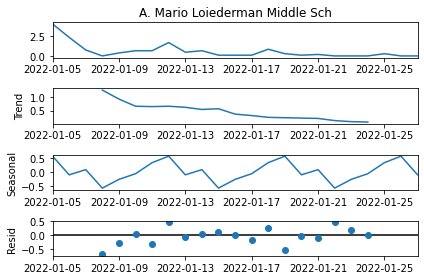

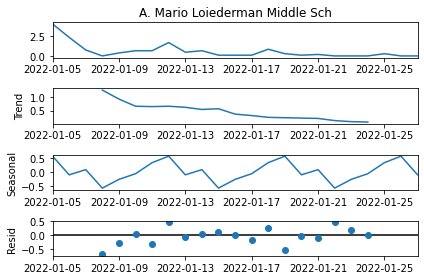

In [49]:
result.plot()